# Project in Replace Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("Churn_modeling.csv")

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.shape

(10000, 14)

In [22]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
# Data Pre-Processing

In [24]:
df=df.drop(["RowNumber", "CustomerId", "Surname"],axis=1)

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df["Geography"].replace({"France":0, "Spain":1, "Germany":2},inplace=True)

In [38]:
df["Gender"].replace({"Male":1, "Female":0},inplace=True)

In [40]:
df.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
5,645,1,1,44,8,113755.78,2,1,0,149756.71,1


In [41]:
df.shape

(10000, 11)

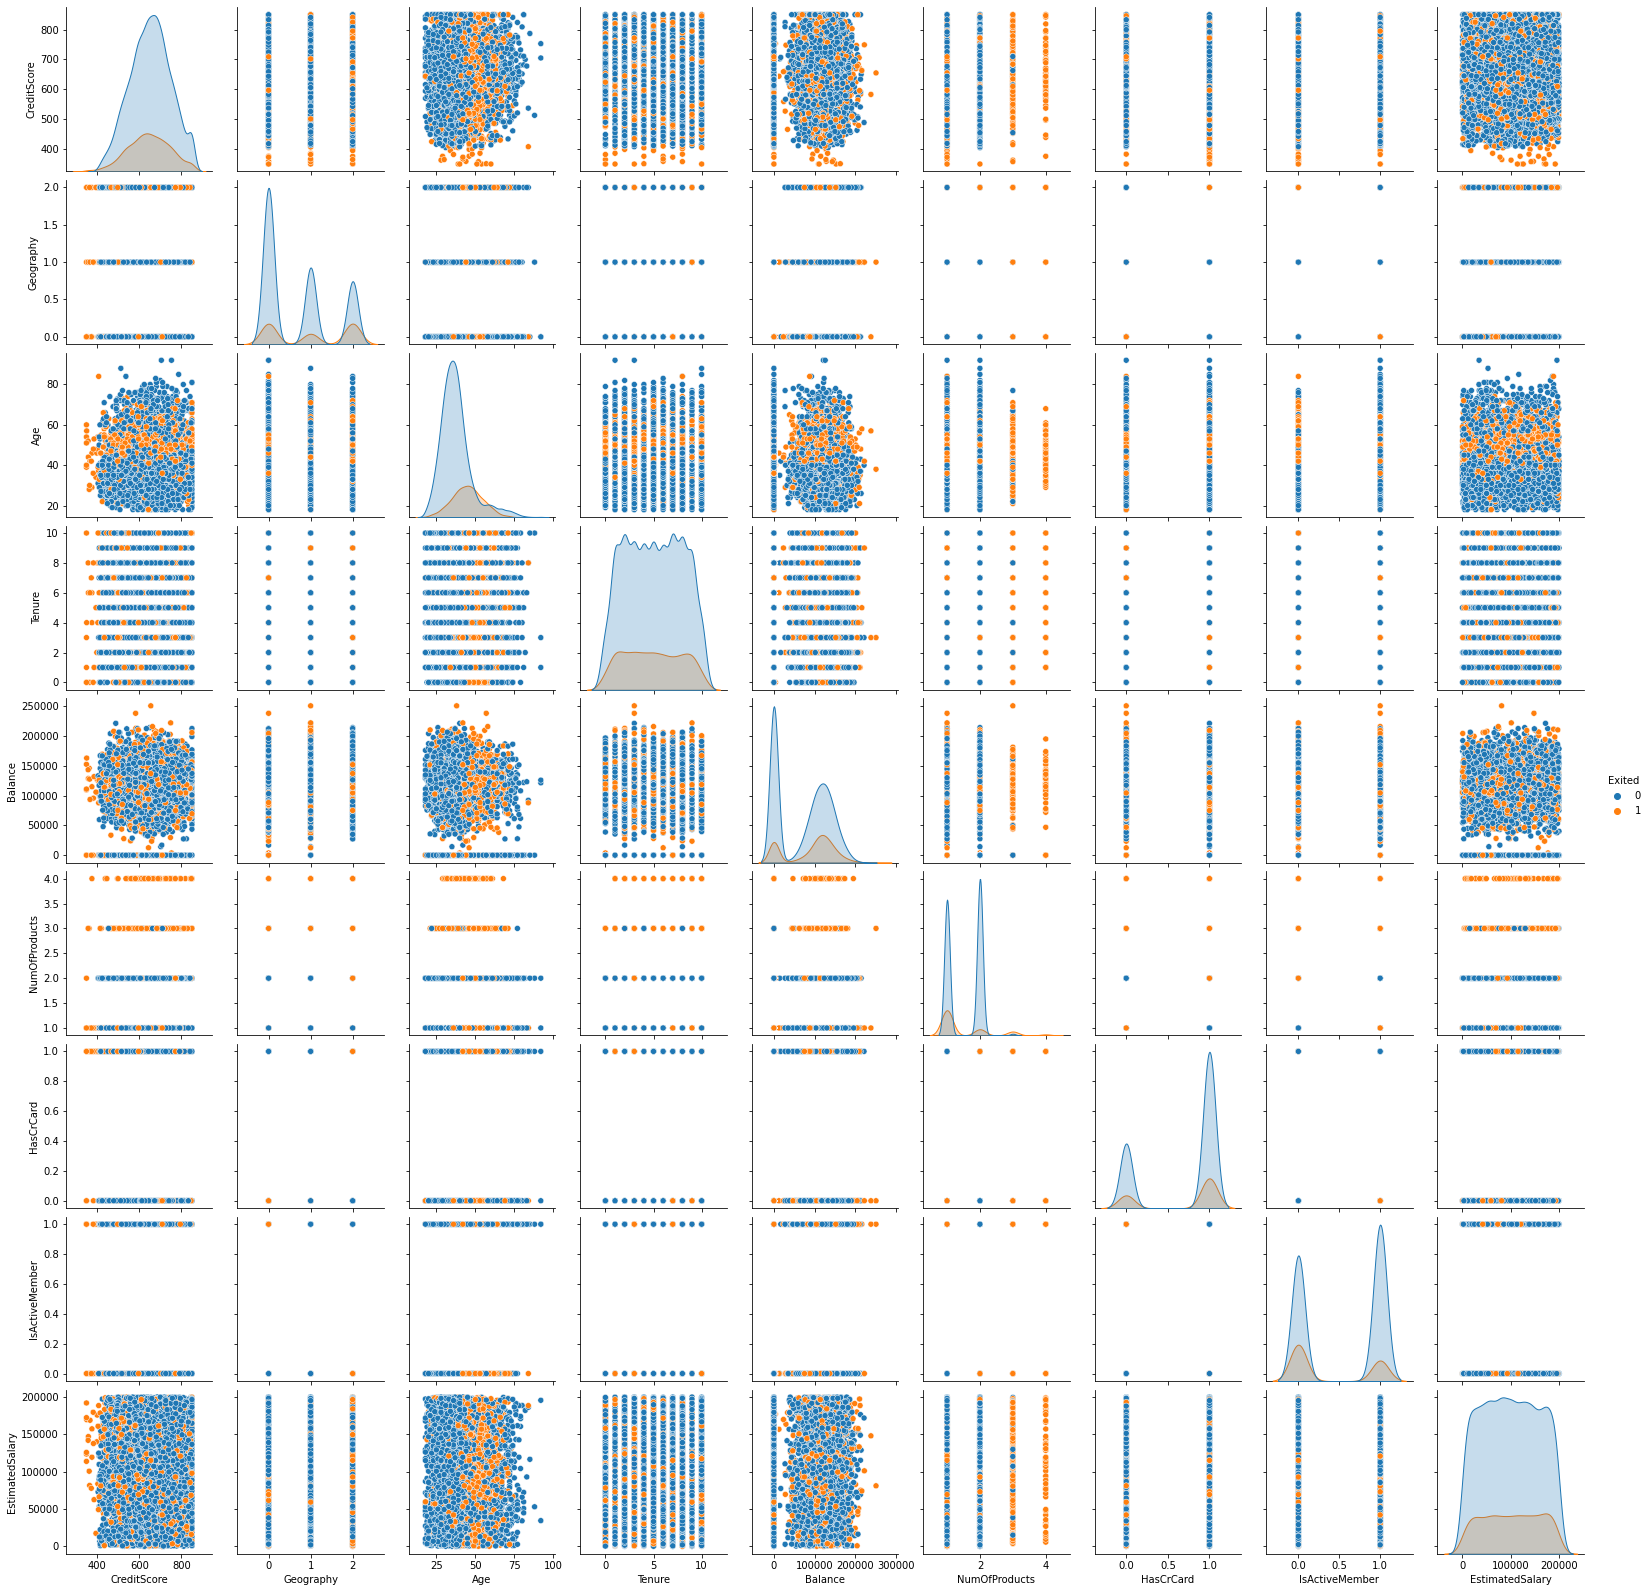

In [30]:
sns.pairplot(df,hue="Exited")

In [42]:
df["Exited"].unique()

array([1, 0], dtype=int64)

In [43]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [44]:
#Dividing dependent and independent variables

X = df.drop("Exited",axis=1)
y=df["Exited"]

In [45]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({1: 7963, 0: 7963})


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
lr_model = classifier.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [ ]:
# Accuracy = TP+TN/TP+FP+FN+TN
# Precision = TP/TP+FP
# Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2036
           1       0.75      0.78      0.77      1946

    accuracy                           0.77      3982
   macro avg       0.77      0.77      0.77      3982
weighted avg       0.77      0.77      0.77      3982



Text(33.0, 0.5, 'Actual Label')

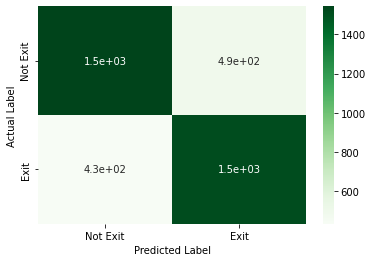

In [58]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

dt_model = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2036
           1       0.77      0.82      0.80      1946

    accuracy                           0.79      3982
   macro avg       0.79      0.79      0.79      3982
weighted avg       0.80      0.79      0.79      3982



Text(33.0, 0.5, 'Actual Label')

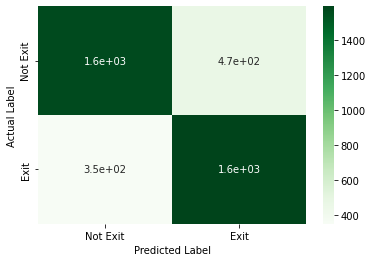

In [62]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=25)

knn_model = clf.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2036
           1       0.80      0.82      0.81      1946

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



Text(33.0, 0.5, 'Actual Label')

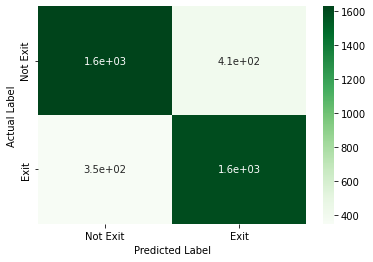

In [65]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

rf_model = clf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2036
           1       0.84      0.85      0.85      1946

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.85      3982
weighted avg       0.85      0.85      0.85      3982



In [ ]:
# seo. L-40

https://github.com/asif851/Bank-Customer-Churn-Prediction-Model/blob/main/ML_customer_churn.ipynb

Text(33.0, 0.5, 'Actual Label')

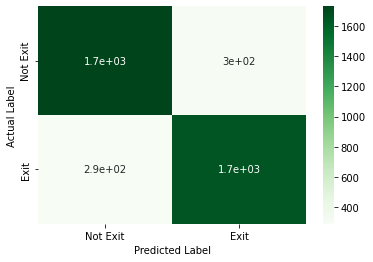

In [68]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
# seo. Saving Model